In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [ ]:
# ========== Grid and Time Setup ==========
Lx, Ly = 1.0, 1.0
T = 1.0
Nx, Ny = 50, 50
Nt = 300
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
t = np.linspace(0, T, Nt)
dx = x[1] - x[0]
dy = y[1] - y[0]
dt = t[1] - t[0]
X, Y = np.meshgrid(x, y, indexing='ij')

\begin{equation}
u(x, y, 0) = \exp\left(-100 \left[ (x - 0.5)^2 + (y - 0.5)^2 \right] \right),
\quad (x, y) \in [0,1]^2
\end{equation}

In [ ]:
# ========== 1. Initial Condition ==========
def set_initial_condition(U):
    U[0] = np.exp(-100 * ((X - 0.5)**2 + (Y - 0.5)**2))

\begin{equation}
u(x, y, t) = 0, \quad \text{for } (x, y) \in \partial \Omega,\ t > 0
\end{equation}

In [ ]:
# ========== 2. Boundary Conditions ==========
def apply_boundary_conditions(U_n, bc_type='dirichlet'):
    if bc_type == 'dirichlet':
        U_n[0, :] = 0
        U_n[-1, :] = 0
        U_n[:, 0] = 0
        U_n[:, -1] = 0
    elif bc_type == 'neumann':
        U_n[0, :] = U_n[1, :]
        U_n[-1, :] = U_n[-2, :]
        U_n[:, 0] = U_n[:, 1]
        U_n[:, -1] = U_n[:, -2]
    elif bc_type == 'periodic':
        U_n[0, :] = U_n[-2, :]
        U_n[-1, :] = U_n[1, :]
        U_n[:, 0] = U_n[:, -2]
        U_n[:, -1] = U_n[:, 1]
    else:
        raise ValueError("Invalid boundary condition type")

In [ ]:
# ========== 3. Source Term ==========
def source_term(U_n, lam):
    return lam * np.sin(U_n)

\begin{equation}
\frac{\partial u}{\partial t} = \alpha \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right) + \lambda \sin(u),
\quad (x, y) \in (0,1)^2,\ t > 0
\end{equation}

In [ ]:
# ========== 4. Solver (Vectorized) ==========
def solve_heat_equation_2d(alpha=0.01, lam=1.0, bc_type='dirichlet'):
    U = np.zeros((Nt, Nx, Ny))
    set_initial_condition(U)

    for n in range(Nt - 1):
        U_n = U[n]
        laplace = (
            (np.roll(U_n, -1, axis=0) - 2 * U_n + np.roll(U_n, 1, axis=0)) / dx**2 +
            (np.roll(U_n, -1, axis=1) - 2 * U_n + np.roll(U_n, 1, axis=1)) / dy**2
        )
        U[n + 1] = U_n + dt * (alpha * laplace + source_term(U_n, lam))
        apply_boundary_conditions(U[n + 1], bc_type=bc_type)
    return U


In [ ]:
# ========== 5. Plotting Functions ==========
def plot_2d_snapshot(U, time_idx):
    plt.figure(figsize=(6, 5))
    plt.contourf(X, Y, U[time_idx], levels=50, cmap='inferno')
    plt.title(f'u(x, y) at t = {t[time_idx]:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.colorbar(label='u')
    plt.tight_layout()
    plt.show()

def plot_xt_slice(U, y_value=0.5):
    j = np.argmin(np.abs(y - y_value))
    plt.figure(figsize=(6, 5))
    plt.imshow(U[:, :, j].T, extent=[0, T, 0, Lx], aspect='auto', origin='lower', cmap='plasma')
    plt.title(f'u(x, t) at y = {y[j]:.2f}')
    plt.xlabel('Time t')
    plt.ylabel('x')
    plt.colorbar(label='u')
    plt.tight_layout()
    plt.show()

def plot_yt_slice(U, x_value=0.5):
    i = np.argmin(np.abs(x - x_value))
    plt.figure(figsize=(6, 5))
    plt.imshow(U[:, i, :].T, extent=[0, T, 0, Ly], aspect='auto', origin='lower', cmap='plasma')
    plt.title(f'u(y, t) at x = {x[i]:.2f}')
    plt.xlabel('Time t')
    plt.ylabel('y')
    plt.colorbar(label='u')
    plt.tight_layout()
    plt.show()

def plot_1d_line(U, at='x', value=0.5, time_idx=0):
    if at == 'x':
        j = np.argmin(np.abs(y - value))
        plt.plot(x, U[time_idx, :, j])
        plt.title(f'u(x) at y = {y[j]:.2f}, t = {t[time_idx]:.2f}')
        plt.xlabel('x')
    elif at == 'y':
        i = np.argmin(np.abs(x - value))
        plt.plot(y, U[time_idx, i, :])
        plt.title(f'u(y) at x = {x[i]:.2f}, t = {t[time_idx]:.2f}')
        plt.xlabel('y')
    plt.ylabel('u')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_3d_surface(U, time_idx):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, U[time_idx], cmap=cm.viridis)
    ax.set_title(f'u(x, y) at t = {t[time_idx]:.2f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u')
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    plt.tight_layout()
    plt.show()

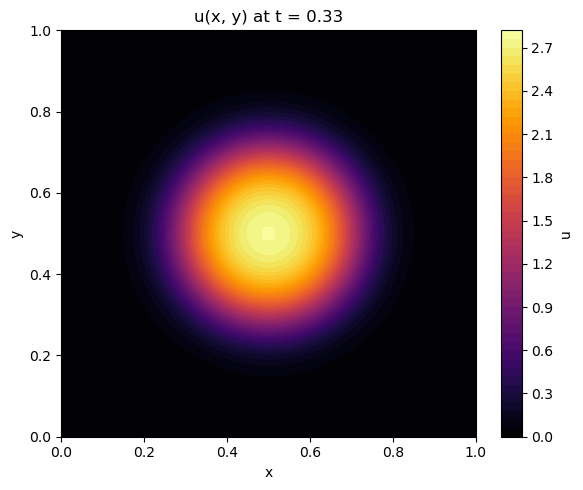

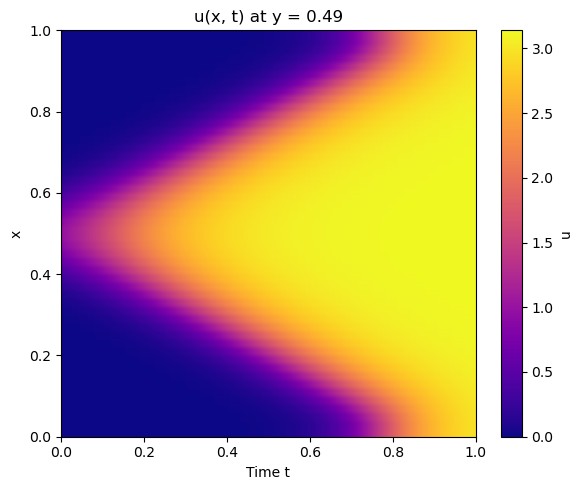

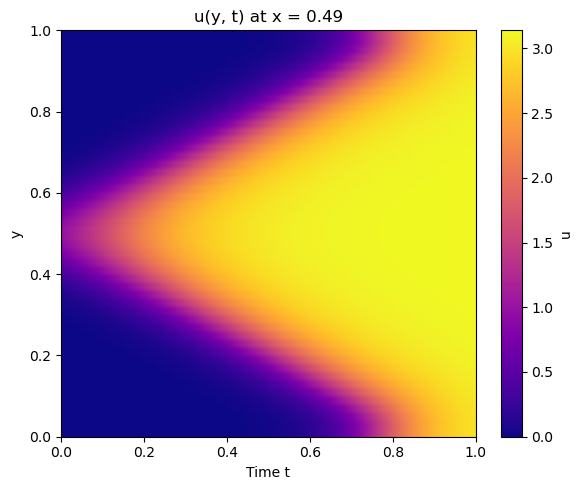

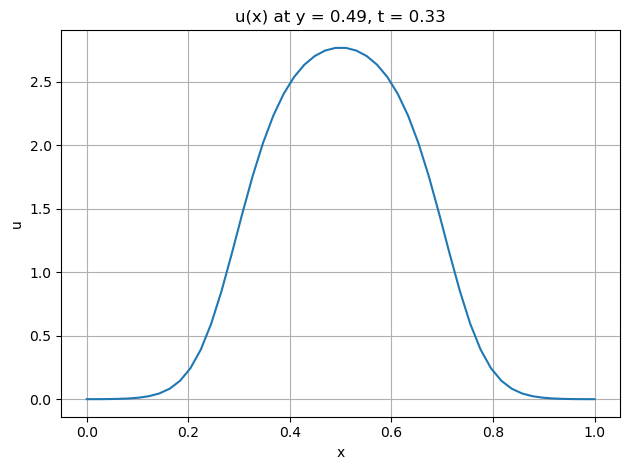

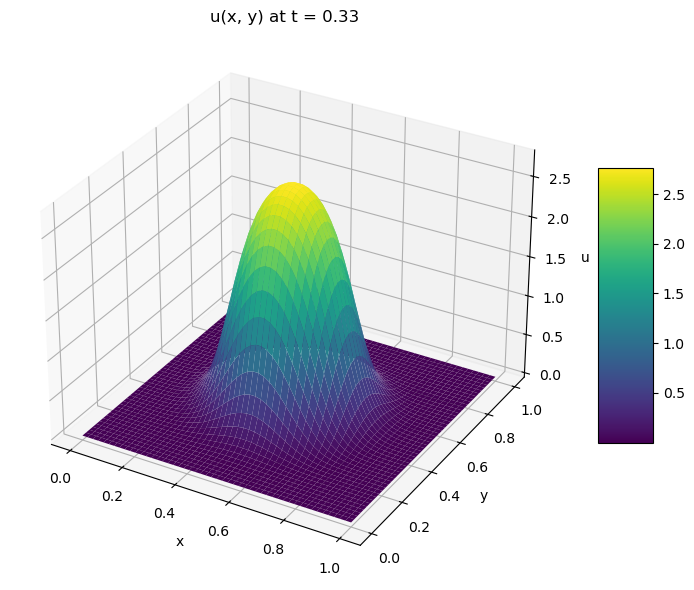

In [9]:
# ========== Run Example ==========
U_result = solve_heat_equation_2d(alpha=0.01, lam=10.0, bc_type='neumann')
plot_2d_snapshot(U_result, time_idx=100)
plot_xt_slice(U_result, y_value=0.5)
plot_yt_slice(U_result, x_value=0.5)
plot_1d_line(U_result, at='x', value=0.5, time_idx=100)
plot_3d_surface(U_result, time_idx=100)

